In [2]:
#필요한 라이브러리 불러오기
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
물가_원본= pd.read_excel('D:/Programming/Jupyter/02.data/DS2_data/농산물데이터/농산물_물가.xlsx')

In [4]:
# '파프리카'와 '파인애플' 열 삭제
물가_원본 = 물가_원본.drop(['파프리카', '파인애플'], axis=1)

In [5]:
# '시점' 열을 float64에서 문자열로 변환합니다.
물가_원본['시점'] = 물가_원본['시점'].astype(str)

# 시점 열의 문자열을 연도와 월로 분리합니다.
물가_원본['연도'] = 물가_원본['시점'].str.split('.').str[0]
물가_원본['월'] = 물가_원본['시점'].str.split('.').str[1]

# '월' 열의 값을 1인 경우에는 10으로 바꿉니다.
물가_원본['월'] = 물가_원본['월'].apply(lambda x: '10' if x == '1' else x)

# 연도, 월, 일을 합쳐서 새로운 '날짜' 열을 생성합니다.
물가_원본['날짜'] = 물가_원본['연도'] + '-' + 물가_원본['월'] + '-01'

# '날짜' 열을 datetime 형식으로 변환합니다.
물가_원본['날짜'] = pd.to_datetime(물가_원본['날짜'], format='%Y-%m-%d')

# '연도', '월' 열 및 이전 '시점' 열을 삭제합니다.
물가_원본.drop(['연도', '월', '시점'], axis=1, inplace=True)


file_path = r'D:/Programming/Jupyter/02.data/DS2_data/전처리데이터/물가지수_전처리.xlsx'
물가_원본.to_excel(file_path, index=False)

print(f'데이터가 {file_path}에 저장되었습니다.')

In [9]:
물가 = 물가_원본.copy()

In [7]:
물가

,배추,상추,시금치,양배추,부추,무,열무,당근,감자,고구마,...,밤,감,귤,오렌지,참외,수박,딸기,바나나,키위,날짜
0,98.562,51.447,71.706,98.324,122.903,88.130,153.129,68.033,108.258,64.917,...,65.888,85.213,75.376,118.110,121.989,112.391,160.811,58.717,98.586,2011-01-01
1,111.735,52.386,77.203,97.513,147.332,77.861,153.129,68.363,117.523,66.661,...,68.604,89.162,73.684,108.231,121.989,112.391,122.343,63.922,98.586,2011-02-01
2,119.841,51.682,49.309,78.254,103.631,80.254,153.129,69.680,116.604,69.489,...,68.604,89.010,77.590,105.789,121.989,112.391,109.730,68.850,96.393,2011-03-01
3,93.496,49.571,36.427,58.184,81.907,82.946,93.248,74.356,113.433,71.715,...,68.604,89.010,77.590,107.787,195.056,112.391,101.532,74.263,91.435,2011-04-01
4,40.070,50.431,40.858,41.965,65.763,74.871,57.746,78.506,90.646,72.617,...,68.604,89.010,77.590,102.681,153.030,117.512,97.643,75.582,92.007,2011-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,159.400,179.790,263.910,95.590,118.060,146.130,181.510,92.470,114.350,87.100,...,98.850,130.160,127.320,129.690,111.700,142.380,98.110,114.020,119.460,2022-08-01
140,210.790,172.650,259.070,97.270,127.790,171.600,156.320,112.480,116.860,87.810,...,97.210,130.370,122.190,124.650,108.580,136.830,94.390,112.110,121.910,2022-09-01
141,145.040,103.270,129.060,102.720,108.910,174.990,109.490,118.100,116.260,83.750,...,99.110,114.480,142.150,119.740,105.110,131.490,90.700,115.580,119.240,2022-10-01
142,78.420,88.200,94.440,95.850,128.210,114.190,94.450,106.290,118.130,81.280,...,98.310,96.960,113.060,110.710,97.890,121.570,83.870,115.450,118.810,2022-11-01


2019년 이전 지수는 소수점 이하 3자리, 2020년 이후 지수는 소수점 이하 2자리로 작성  

품목별 소비자물가지수

In [8]:
물가.dtypes

배추             float64
상추             float64
시금치            float64
양배추            float64
부추             float64
무              float64
열무             float64
당근             float64
감자             float64
고구마            float64
콩나물            float64
오이             float64
풋고추            float64
호박             float64
가지             float64
토마토            float64
파              float64
양파             float64
마늘             float64
브로콜리           float64
고사리            float64
생강             float64
사과             float64
배              float64
복숭아            float64
포도             float64
밤              float64
감              float64
귤              float64
오렌지            float64
참외             float64
수박             float64
딸기             float64
바나나            float64
키위             float64
날짜      datetime64[ns]
dtype: object

# 분석

<h3>가격 동향 -(키워드) 검색</h3>

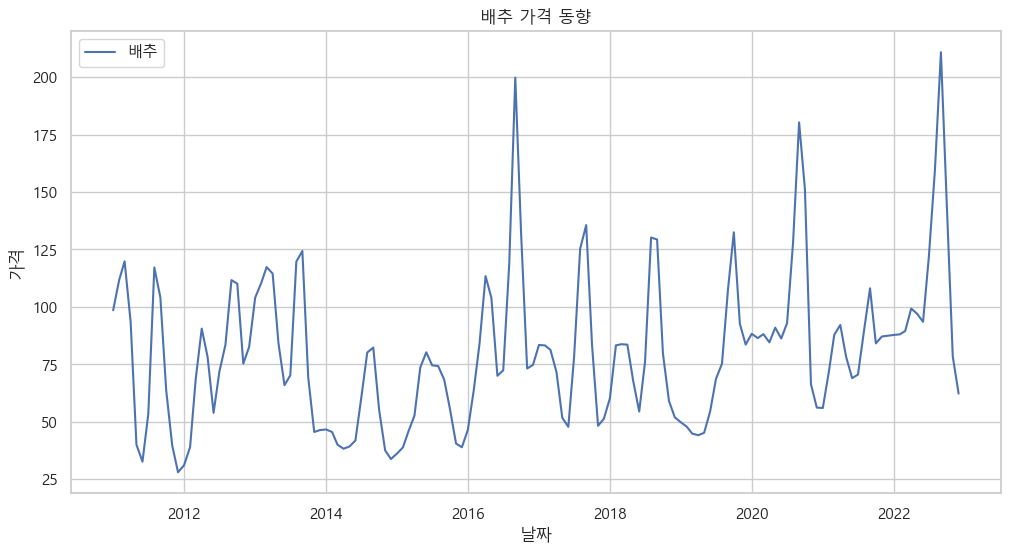

In [10]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 캐시 지우기
from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

# 날짜를 인덱스로 설정
물가.set_index('날짜', inplace=True)

# 특정 농산물 가격 동향 시각화 함수 정의
def visualize_crop_trend(df, crop_keyword):
    plt.figure(figsize=(12, 6))
    
    # crop_keyword와 정확하게 일치하는 열만 선택하여 시각화
    selected_column = [col for col in df.columns if col == crop_keyword]
    for crop in selected_column:
        plt.plot(df.index, df[crop], label=crop)

    plt.title(f'{crop_keyword} 가격 동향')
    plt.xlabel('날짜')
    plt.ylabel('가격')
    plt.legend()
    plt.show()

# 특정 농산물 가격 동향 시각화
crop_keyword_to_visualize = '배추'
visualize_crop_trend(물가, crop_keyword_to_visualize)

In [10]:
# 날짜를 다시 열로 변환
물가.reset_index(inplace=True)

In [11]:
물가.dtypes

날짜      datetime64[ns]
배추             float64
상추             float64
시금치            float64
양배추            float64
부추             float64
무              float64
열무             float64
당근             float64
감자             float64
고구마            float64
콩나물            float64
오이             float64
풋고추            float64
호박             float64
가지             float64
토마토            float64
파              float64
양파             float64
마늘             float64
브로콜리           float64
고사리            float64
생강             float64
사과             float64
배              float64
복숭아            float64
포도             float64
밤              float64
감              float64
귤              float64
오렌지            float64
참외             float64
수박             float64
딸기             float64
바나나            float64
키위             float64
dtype: object

데이터에서 가격이나 소비자물가지수의 단위는 원(₩)이기 때문에 숫자 자체가 특별한 표시나 단위 변환 없이도 이해하기 쉽습니다. 데이터 프레임에서 각 품목에 대한 소비자물가지수는 해당 품목의 가격지수를 나타냅니다. 가격지수는 일반적으로 특정 기준기간의 평균 가격을 100으로 설정하고, 다른 시기의 가격을 상대적으로 나타내는 지수입니다.

따라서 특정 품목의 소비자물가지수가 100보다 높으면 해당 품목의 가격이 상승했음을 의미하고, 100보다 낮으면 가격이 하락했음을 나타냅니다. 각 품목의 가격변화를 비교하려면 해당 품목의 소비자물가지수의 움직임을 살펴보면 됩니다.

In [12]:
# 2021년의 물가지수를 저장할 딕셔너리
cpi_2021 = {}

for crop in 물가.columns[1:]:  # 첫번째 열은 날짜이므로 제외
    # 2021년의 물가지수
    cpi_2021_value = 물가[crop][물가['날짜'].dt.year == 2021].values[0]

    # 딕셔너리에 저장
    cpi_2021[crop] = {'물가지수_2021': cpi_2021_value}

# 물가지수를 기준으로 정렬하여 순위 계산
ranked_crops_cpi_2021 = sorted(cpi_2021, key=lambda k: cpi_2021[k]['물가지수_2021'], reverse=True)

# 순위 및 물가지수 출력
for rank, crop in enumerate(ranked_crops_cpi_2021, start=1):
    cpi_info = cpi_2021[crop]
    print(f'순위 {rank}: {crop} (물가지수: {cpi_info["물가지수_2021"]})')


순위 1: 파 (물가지수: 150.2)
순위 2: 가지 (물가지수: 139.71)
순위 3: 딸기 (물가지수: 137.07)
순위 4: 부추 (물가지수: 135.79)
순위 5: 호박 (물가지수: 127.29)
순위 6: 양파 (물가지수: 126.5)
순위 7: 오이 (물가지수: 126.06)
순위 8: 배 (물가지수: 124.59)
순위 9: 사과 (물가지수: 119.16)
순위 10: 마늘 (물가지수: 118.45)
순위 11: 감자 (물가지수: 114.38)
순위 12: 복숭아 (물가지수: 111.16)
순위 13: 오렌지 (물가지수: 110.79)
순위 14: 감 (물가지수: 107.29)
순위 15: 키위 (물가지수: 106.73)
순위 16: 상추 (물가지수: 105.92)
순위 17: 고구마 (물가지수: 103.2)
순위 18: 고사리 (물가지수: 102.65)
순위 19: 포도 (물가지수: 101.94)
순위 20: 수박 (물가지수: 101.89)
순위 21: 콩나물 (물가지수: 101.18)
순위 22: 시금치 (물가지수: 100.99)
순위 23: 밤 (물가지수: 99.65)
순위 24: 양배추 (물가지수: 96.88)
순위 25: 토마토 (물가지수: 94.34)
순위 26: 참외 (물가지수: 93.82)
순위 27: 바나나 (물가지수: 92.14)
순위 28: 브로콜리 (물가지수: 90.45)
순위 29: 풋고추 (물가지수: 89.73)
순위 30: 무 (물가지수: 89.07)
순위 31: 열무 (물가지수: 84.71)
순위 32: 생강 (물가지수: 82.26)
순위 33: 귤 (물가지수: 81.21)
순위 34: 당근 (물가지수: 76.86)
순위 35: 배추 (물가지수: 56.05)


In [13]:
# 2022년의 물가지수를 저장할 딕셔너리
cpi_2022 = {}

for crop in 물가.columns[1:]:  # 첫번째 열은 날짜이므로 제외
    # 2022년의 물가지수
    cpi_2022_value = 물가[crop][물가['날짜'].dt.year == 2022].values[0]

    # 딕셔너리에 저장
    cpi_2022[crop] = {'물가지수_2022': cpi_2022_value}

# 물가지수를 기준으로 정렬하여 순위 계산
ranked_crops_cpi_2022 = sorted(cpi_2022, key=lambda k: cpi_2022[k]['물가지수_2022'], reverse=True)

# 순위 및 물가지수 출력
for rank, crop in enumerate(ranked_crops_cpi_2022, start=1):
    cpi_info = cpi_2022[crop]
    print(f'순위 {rank}: {crop} (물가지수: {cpi_info["물가지수_2022"]})')


순위 1: 딸기 (물가지수: 198.88)
순위 2: 복숭아 (물가지수: 141.58)
순위 3: 부추 (물가지수: 141.11)
순위 4: 오이 (물가지수: 141.07)
순위 5: 마늘 (물가지수: 140.76)
순위 6: 수박 (물가지수: 140.59)
순위 7: 호박 (물가지수: 138.06)
순위 8: 가지 (물가지수: 137.51)
순위 9: 감 (물가지수: 125.46)
순위 10: 포도 (물가지수: 123.7)
순위 11: 오렌지 (물가지수: 123.12)
순위 12: 감자 (물가지수: 118.65)
순위 13: 고사리 (물가지수: 118.32)
순위 14: 토마토 (물가지수: 117.51)
순위 15: 열무 (물가지수: 116.36)
순위 16: 배 (물가지수: 115.86)
순위 17: 키위 (물가지수: 109.73)
순위 18: 참외 (물가지수: 108.66)
순위 19: 상추 (물가지수: 107.84)
순위 20: 브로콜리 (물가지수: 106.54)
순위 21: 콩나물 (물가지수: 104.91)
순위 22: 바나나 (물가지수: 100.73)
순위 23: 사과 (물가지수: 99.99)
순위 24: 밤 (물가지수: 99.74)
순위 25: 귤 (물가지수: 99.66)
순위 26: 풋고추 (물가지수: 99.52)
순위 27: 시금치 (물가지수: 96.61)
순위 28: 파 (물가지수: 94.12)
순위 29: 고구마 (물가지수: 89.12)
순위 30: 배추 (물가지수: 87.82)
순위 31: 양파 (물가지수: 86.45)
순위 32: 무 (물가지수: 78.99)
순위 33: 당근 (물가지수: 71.71)
순위 34: 양배추 (물가지수: 68.79)
순위 35: 생강 (물가지수: 60.0)


<h3>계절적 패턴 탐지:</h3>

농산물 가격에는 계절적인 변동이 있을 수 있습니다. 계절적 패턴을 탐지하고 특정 계절에 가격이 어떻게 변하는지 확인할 수 있습니다.

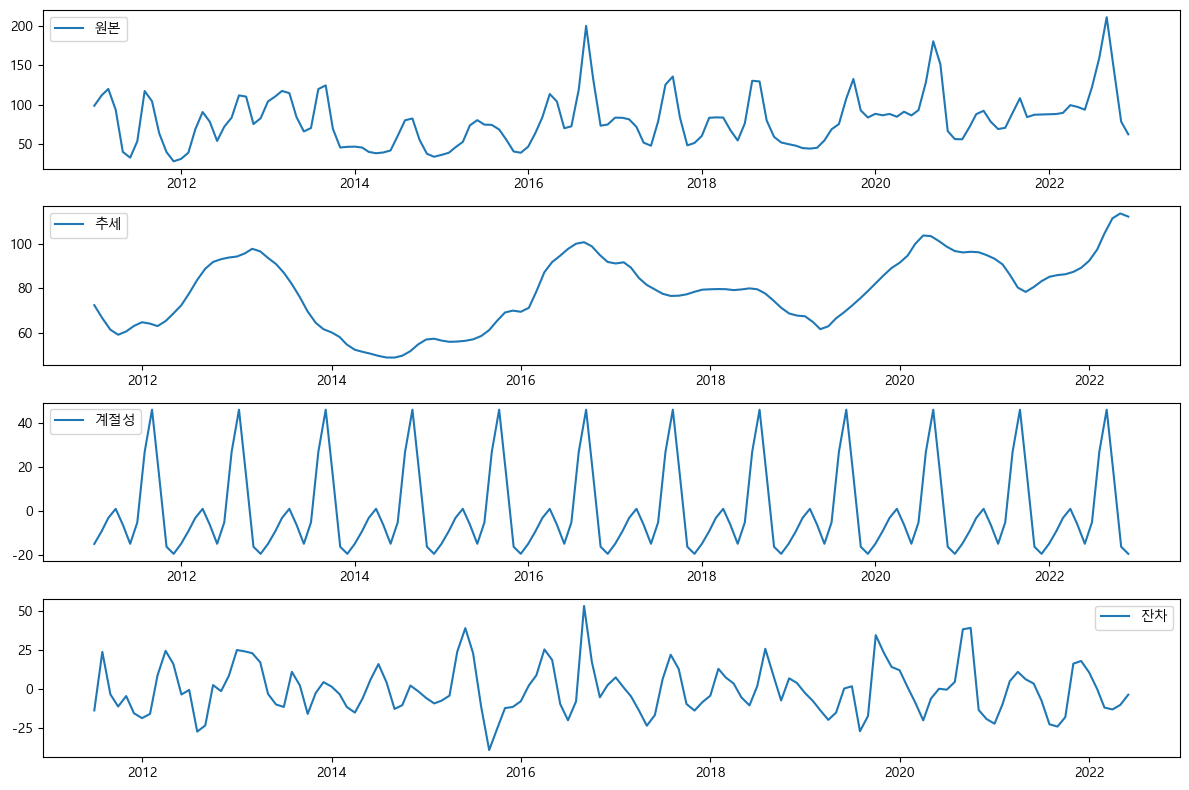

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# '날짜' 열을 인덱스로 설정
물가.set_index('날짜', inplace=True)

# 특정 농산물 선택 (예: 배추)
crop_to_analyze = '배추'
농산물_시계열 = 물가[crop_to_analyze]

# Seasonal Decomposition 수행
result = seasonal_decompose(농산물_시계열, model='additive', period=12)  # 주기성이 12개월일 경우

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(농산물_시계열, label='원본')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='추세')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='계절성')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='잔차')
plt.legend()

plt.tight_layout()
plt.show()


<h3>시계열 예측: </h3>

시계열 데이터를 활용하여 미래의 농산물 가격을 예측할 수 있습니다. 이를 통해 농산물 시장에 대한 미래 경향성을 파악할 수 있습니다.